<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB
Dataframe contains stock prices between 2016-08-16 00:00:00 2021-08-13 00:00:00
Total days = 1823 days


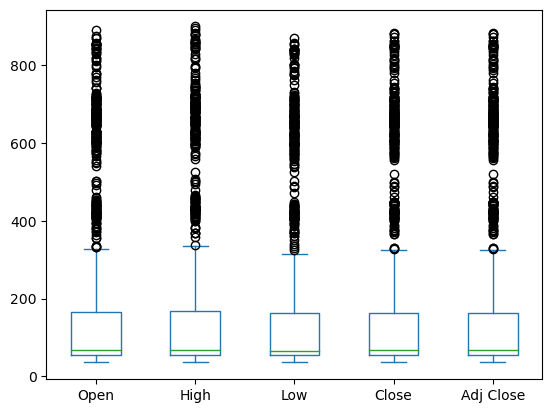

In [2]:
#!/usr/bin/env python
# coding: utf-8

# In[2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


# In[11]:


tesla = pd.read_csv('tesla_stock_data.csv')
tesla.head()
my_string = r"\u00A9"



# In[12]:


tesla.info()


# In[14]:


tesla['Date'] = pd.to_datetime(tesla['Date'])


# In[16]:


print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}') 
print(f'Total days = {(tesla.Date.max()  - tesla.Date.min()).days} days')


# In[15]:


tesla.describe()


# In[17]:


tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')


# In[21]:


#setting layout for plot
layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

tesla_data = [{'x':tesla['Date'], 'y':tesla['Close']}]
plot = go.Figure(data=tesla_data, layout=layout)


# In[19]:


#plotting offline
iplot(plot)


# In[22]:


# Building regression model
from sklearn.model_selection import train_test_split

#preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score


# In[23]:


#Spliting the data into train and test sets
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)


# In[24]:


# Feature scaling
scaler = StandardScaler().fit(X_train)


# In[26]:


from sklearn.linear_model import LinearRegression


# In[27]:


#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)


# In[28]:


#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=tesla_data, layout=layout)




In [3]:
iplot(plot2)

In [4]:

# In[30]:


#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.5697753473789757	0.5250549450503974
MSE       23289.709943589114	22075.584147785165

